In [182]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [183]:
df = pd.read_csv('2004-2021.tsv', sep='\t')

### Aqui é necessária uma análise nos dados NaN, faremos depois...

In [184]:
df

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

### Analisaremos apenas os seguintes combustíveis: Gasolina comum, GLP, Óleo Diesel e Etanol Hidratado. Todas as regiões.

## Vamos criar tabelas separadas de mês e ano, para facilitar os agrupamentos

In [186]:
df['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'])

In [187]:
df['MÊS'] = df['DATA FINAL'].dt.month
df['ANO'] = df['DATA FINAL'].dt.year

In [188]:
df

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,5,2021
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,5,2021
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,5,2021
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,5,2021


In [189]:
df2 = df[['DATA FINAL','REGIÃO', 'PRODUTO', 'PREÇO MÉDIO REVENDA', 'MÊS', 'ANO']]

### Análise feita sobre o **preço médio de revenda** dos combustíveis.

In [190]:
df2 = df2.pivot_table(values = 'PREÇO MÉDIO REVENDA', index=['ANO', 'MÊS','REGIÃO'], columns = 'PRODUTO')

In [191]:
df2

PRODUTO                ETANOL HIDRATADO  GASOLINA ADITIVADA  GASOLINA COMUM  \
ANO  MÊS REGIÃO                                                               
2004 5   CENTRO OESTE          1.272167                 NaN        2.131500   
         NORDESTE              1.365444                 NaN        2.042185   
         NORTE                 1.591143                 NaN        2.204810   
         SUDESTE               1.056583                 NaN        1.983167   
         SUL                   1.131111                 NaN        2.055111   
...                                 ...                 ...             ...   
2021 5   CENTRO OESTE          4.116250            5.701250        5.587000   
         NORDESTE              4.439444            5.541333        5.390000   
         NORTE                 4.647000            5.679143        5.544143   
         SUDESTE               4.294250            5.834000        5.672500   
         SUL                   4.591667            5.528000        5.381000   

PRODUTO                      GLP       GNV  OLEO DIESEL  OLEO DIESEL S10  \
ANO  MÊS REGIÃO                                                            
2004 5   CENTRO OESTE  33.822833  1.099000          NaN              NaN   
         NORDESTE      32.996481  1.130619          NaN              NaN   
         NORTE         34.094429       NaN          NaN              NaN   
         SUDESTE       29.300667  1.095583          NaN              NaN   
         SUL           30.716333  1.195000          NaN              NaN   
...                          ...       ...          ...              ...   
2021 5   CENTRO OESTE  89.613750  3.166500     4.315750         4.386500   
         NORDESTE      85.144667  3.322429     4.260667         4.345111   
         NORTE         98.344857       NaN     4.551143         4.559000   
         SUDESTE       82.940250  3.251250     4.160500         4.233000   
         SUL           87.274667  3.728000     4.051333         4.108333   

PRODUTO                ÓLEO DIESEL  ÓLEO DIESEL S10  
ANO  MÊS REGIÃO                                      
2004 5   CENTRO OESTE     1.504083              NaN  
         NORDESTE         1.367815              NaN  
         NORTE            1.547524              NaN  
         SUDESTE          1.379917              NaN  
         SUL              1.396444              NaN  
...                            ...              ...  
2021 5   CENTRO OESTE          NaN              NaN  
         NORDESTE              NaN              NaN  
         NORTE                 NaN              NaN  
         SUDESTE               NaN              NaN  
         SUL                   NaN              NaN  

[1020 rows x 9 columns]

### Aqui escolhemos o produto com o qual vamos fazer a análise.
### EX: *df2['GASOLINA COMUM'].unstack(2)[REGIÃO ESCOLHIDA]*

In [192]:
reg = df2['GASOLINA COMUM'].unstack(2).columns.to_list()
#Regiões
plt.rcParams["figure.figsize"] = (20,8)

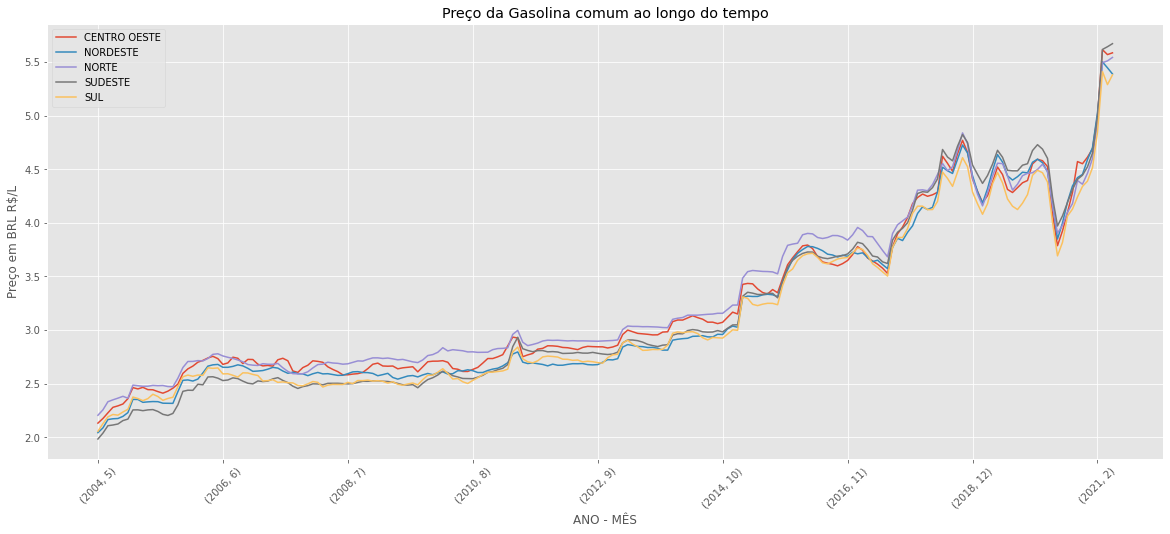

In [193]:
reg = df2['GASOLINA COMUM'].unstack(2).columns.to_list()
for reg in reg:
    plt.style.use('ggplot')
    df2['GASOLINA COMUM'].unstack(2)[reg].plot()
    plt.xticks(rotation = 45)
    plt.legend()

    
plt.xlabel('ANO - MÊS')
plt.ylabel('Preço em BRL R$/L')
plt.title('Preço da Gasolina comum ao longo do tempo')
plt.show()

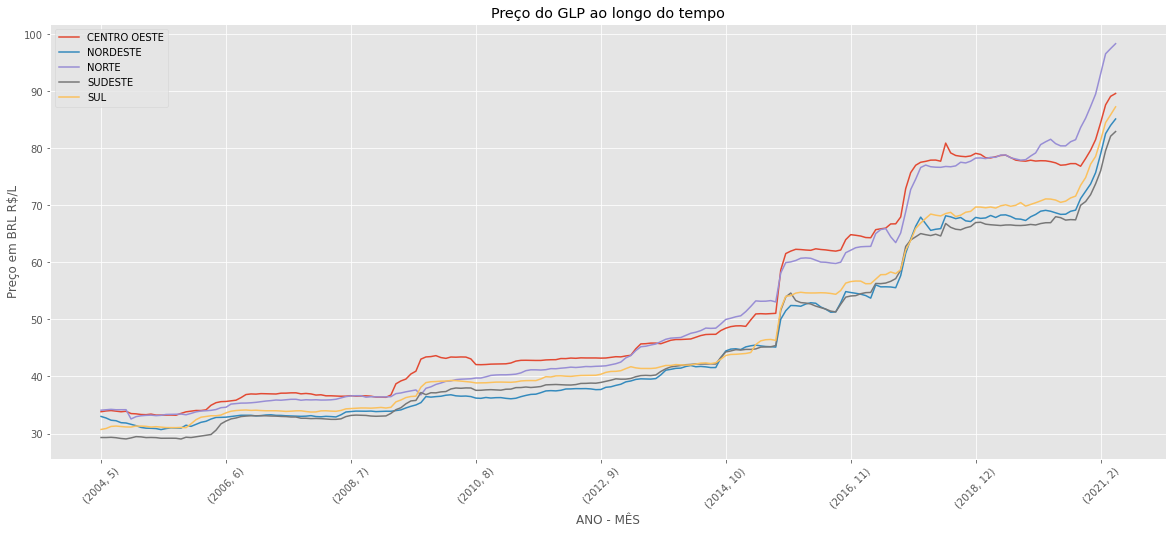

In [194]:
reg = df2['GASOLINA COMUM'].unstack(2).columns.to_list()
for reg in reg:
    df2['GLP'].unstack(2)[reg].plot()
    plt.xticks(rotation = 45)
    plt.legend()
    
plt.xlabel('ANO - MÊS')
plt.ylabel('Preço em BRL R$/L')
plt.title('Preço do GLP ao longo do tempo')
plt.show()

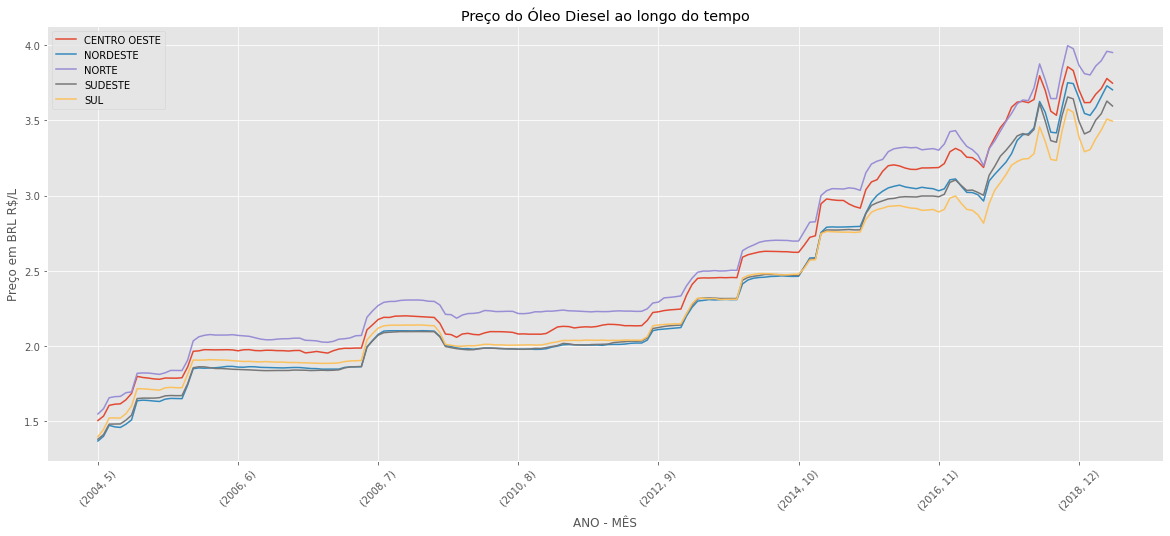

In [195]:
reg = df2['GASOLINA COMUM'].unstack(2).columns.to_list()
for reg in reg:
    df2['ÓLEO DIESEL'].unstack(2)[reg].plot()
    plt.xticks(rotation = 45)
    plt.legend()

plt.xlabel('ANO - MÊS')
plt.ylabel('Preço em BRL R$/L')
plt.title('Preço do Óleo Diesel ao longo do tempo')
plt.show()

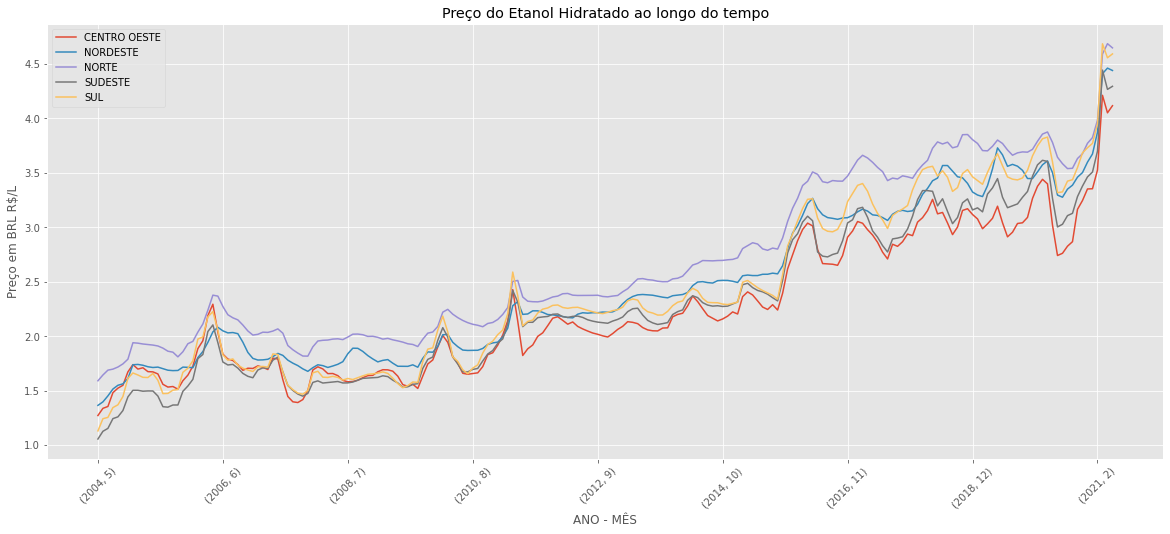

In [196]:
reg = df2['GASOLINA COMUM'].unstack(2).columns.to_list()
for reg in reg:
    df2['ETANOL HIDRATADO'].unstack(2)[reg].plot()
    plt.xticks(rotation = 45)
    plt.legend()

plt.xlabel('ANO - MÊS')
plt.ylabel('Preço em BRL R$/L')
plt.title('Preço do Etanol Hidratado ao longo do tempo')
plt.show()

## Numa primeira análise, o preço dos combustíveis é maior para a região Norte. Para o GLP, a região Centro Oeste mostrou uma diferença considerável nos preços. O que possivelmente causaria isso??


### As variações percentuais:

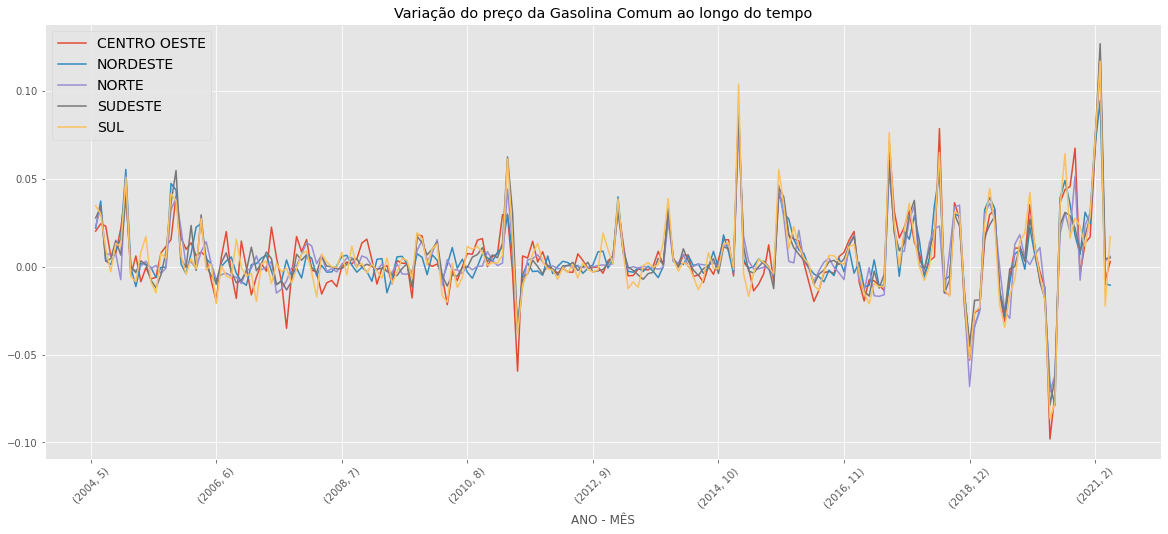

In [197]:
reg = df2['GASOLINA COMUM'].unstack(2).columns.to_list()
for reg in reg:
    df2['GASOLINA COMUM'].unstack(2)[reg].pct_change().plot()

plt.legend(fontsize = 14)
plt.xticks(rotation = 45)
plt.xlabel('ANO - MÊS')
plt.title('Variação do preço da Gasolina Comum ao longo do tempo')
plt.show()

## No período entre 2006 e 2009 a gasolina comum apresentou variações mais intensas com relação aos outros combustíveis. Qual era o cenário político e econômico naquela conjuntura? Do outro lado, podemos perceber que entre 2015 e 2021 todos os combustiveis apresentaram variações de preço semelhantes, cenário que poderia apontar um crescimento generalizado dos preços, em resumo, inflação.

### Vamos analisar o IGP-M do período:

In [198]:
igpm = pd.read_csv('igpm.csv')

In [199]:
igpm.reset_index(drop=True, inplace=True)

In [200]:
igpm.drop([204])

,var
0,0.0131
1,0.0138
2,0.0131
3,0.0122
4,0.0069
...,...
199,0.0096
200,0.0258
201,0.0253
202,0.0294


In [201]:
comb_list = ['GASOLINA COMUM', 'ÓLEO DIESEL', 'GLP', 'ETANOL HIDRATADO']
reg = ['CENTRO OESTE', 'SUL', 'NORDESTE', 'NORTE', 'SUDESTE']

def plots(comb, reg):
    df2[comb].unstack(2)[reg].plot()
    plt.title(f'Evolução do preço no tempo \n \n {comb} : {reg}')
    plt.xticks(rotation = 45)
    plt.xlabel('\n Mês - Ano', fontsize = 20)
    plt.ylabel('Preço do combustível em BRL R$/Litro', fontsize = 20)

interactive(plots, comb=comb_list, reg=reg)

interactive(children=(Dropdown(description='comb', options=('GASOLINA COMUM', 'ÓLEO DIESEL', 'GLP', 'ETANOL HI…

## Vamos analisar o IGP-M do período:
A ideia é verificar se há alguma correlação significativa entre a variação do preço dos combustíveis com o IGP-M, pois entendemos que existe causalidade entre esses dois índices. É fato de que o aumento no preço dos combustíveis provoca um aumento no índice geral de preços, ainda mais em uma economia tão dependente da malha rodoviária como é a nossa.

In [202]:
igpm = pd.read_csv('igpm.csv')

In [203]:
igpm.reset_index(drop=True, inplace=True)

In [204]:
igpm.drop([204])
#Carregada a tabela do IGP-M

,var
0,0.0131
1,0.0138
2,0.0131
3,0.0122
4,0.0069
...,...
199,0.0096
200,0.0258
201,0.0253
202,0.0294


In [207]:
comb_list = ['GASOLINA COMUM', 'ÓLEO DIESEL', 'GLP', 'ETANOL HIDRATADO']
reg = ['CENTRO OESTE', 'SUL', 'NORDESTE', 'NORTE', 'SUDESTE']

def corr_comb(comb,reg):
    sns.regplot(df2[comb].unstack(2)[reg].pct_change().fillna(0), igpm['var'].drop(0))
    corr = df2[comb].unstack(2)[reg].pct_change().reset_index()[reg].corr(igpm['var'].drop(0))
    plt.title(f'Evolução do preço no tempo \n \n {comb} na região {reg} - Correlação = {corr}', fontsize = 20)
    plt.xticks(rotation = 45)
    plt.xlabel('\n Mês - Ano', fontsize = 20)
    plt.ylabel('Preço do combustível em BRL R$/Litro', fontsize = 20)

plt.show()
interactive(corr_comb, comb =comb_list, reg = reg)
    

interactive(children=(Dropdown(description='comb', options=('GASOLINA COMUM', 'ÓLEO DIESEL', 'GLP', 'ETANOL HI…